In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time
import seaborn as sns

In [4]:
df = pd.read_csv("Concrete.csv")

## Deliverable 1

In [5]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [8]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [9]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

- There are 9 columns in total
    - One target column - 'strength'
    - All are numeric & continuous columns
    - 8 predictor variables
- There are no null values 

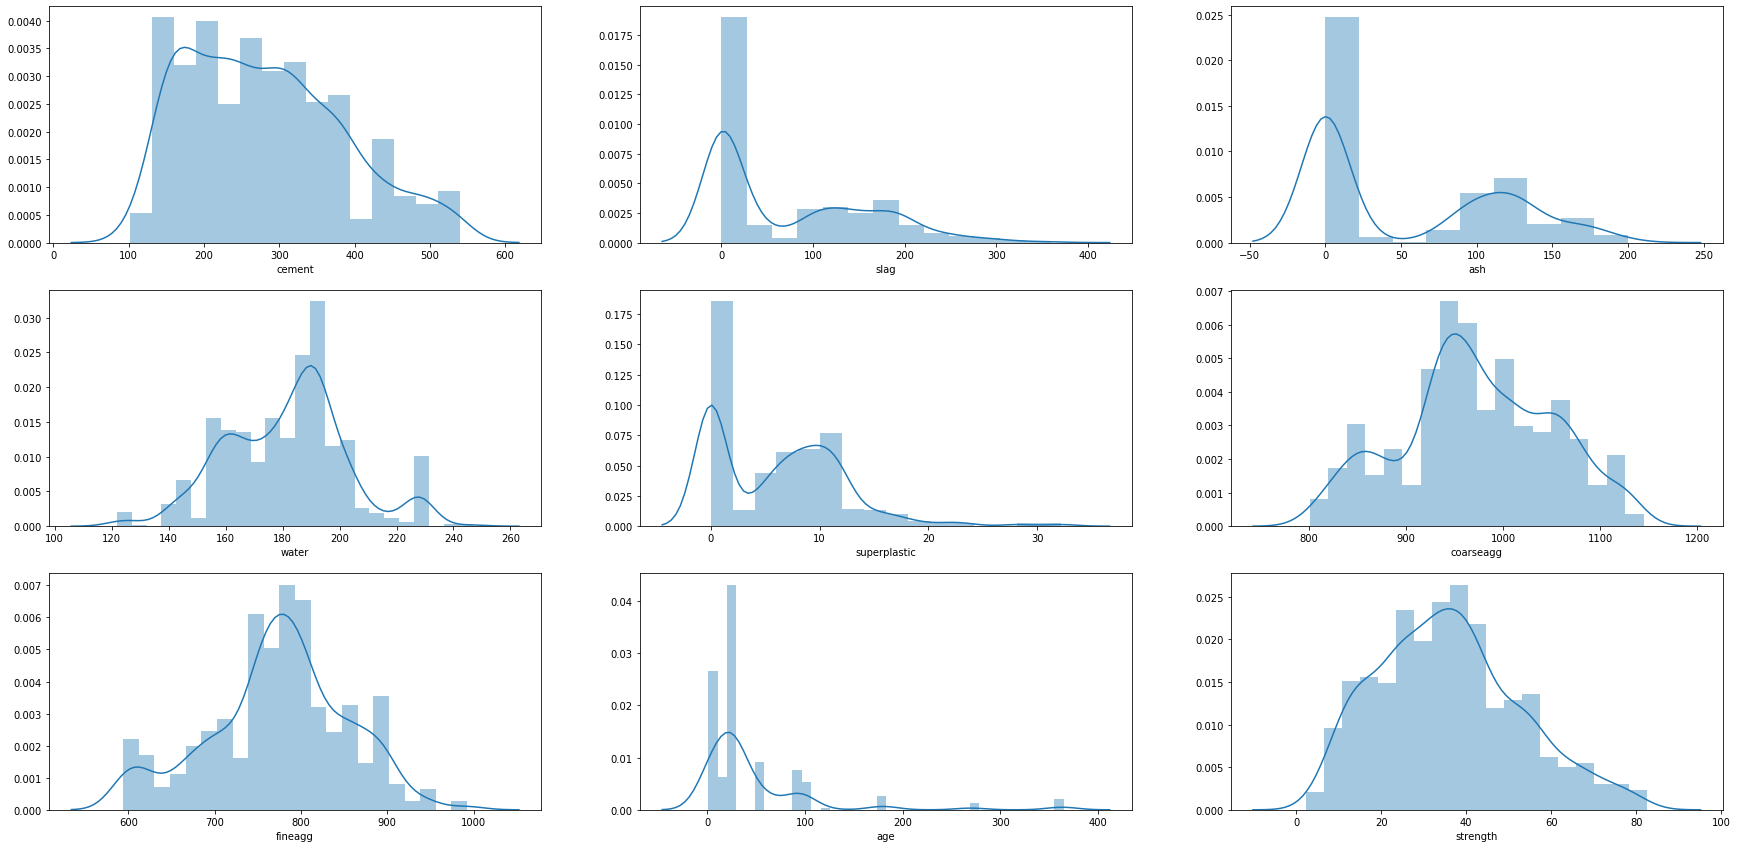

In [10]:
plt.figure(figsize= (30,20))  
pos = 1 
for feature in df.columns:   
    plt.subplot(4, 3, pos)   
    if feature in df.columns:   
         sns.distplot(df[feature], kde= True )
    pos += 1 

In [11]:
df.skew().sort_values()

fineagg        -0.253010
coarseagg      -0.040220
water           0.074628
strength        0.416977
cement          0.509481
ash             0.537354
slag            0.800717
superplastic    0.907203
age             3.269177
dtype: float64

- coarseagg and water are nearly having normal distribution.
- strength,cement ,ash,slag and superplastic are lightly right skewed.
- age is highly right skewed.

### adding links
[http://localhost:8888/tree]

cement             AxesSubplot(0.125,0.657941;0.227941x0.222059)
slag            AxesSubplot(0.398529,0.657941;0.227941x0.222059)
ash             AxesSubplot(0.672059,0.657941;0.227941x0.222059)
water              AxesSubplot(0.125,0.391471;0.227941x0.222059)
superplastic    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
coarseagg       AxesSubplot(0.672059,0.391471;0.227941x0.222059)
fineagg               AxesSubplot(0.125,0.125;0.227941x0.222059)
age                AxesSubplot(0.398529,0.125;0.227941x0.222059)
strength           AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

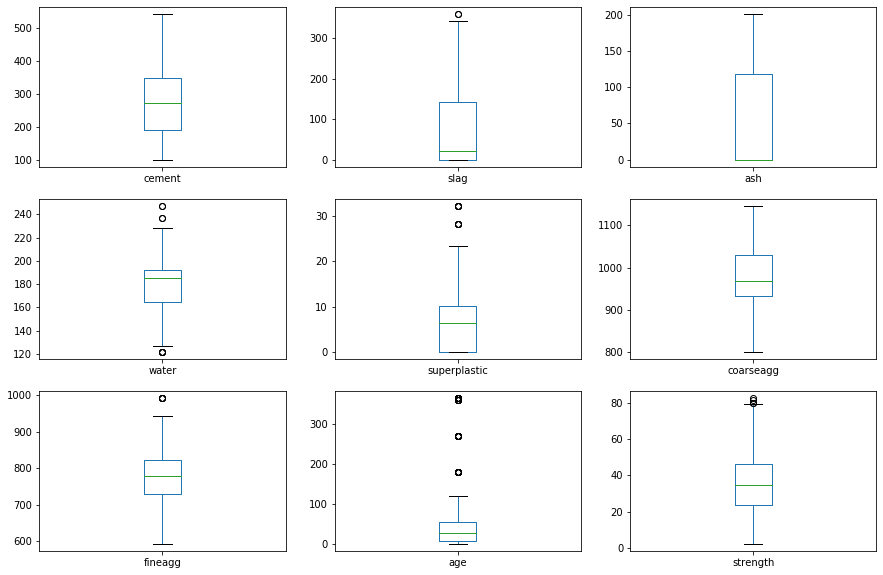

In [12]:
df.plot(kind= 'box' , subplots=True,layout=(3,3), sharex=False, sharey=False, figsize=(15,10))

In [13]:

def outliers_handling(cols):
    cols = pd.DataFrame(cols)
    Q1 = cols.quantile(0.25)
    Q3 = cols.quantile(0.75)
    IQR = Q3 - Q1
    # print(IQR)

    # Replace every outlier on the lower side by the lower whisker
    for i, j in zip(np.where(cols < Q1 - 1.5 * IQR)[0], np.where(cols < Q1 - 1.5 * IQR)[1]): 

        whisker  = Q1 - 1.5 * IQR
        cols.iloc[i,j] = whisker[j]


    #Replace every outlier on the upper side by the upper whisker    
    for i, j in zip(np.where(cols > Q3 + 1.5 * IQR)[0], np.where(cols > Q3 + 1.5 * IQR)[1]):

        whisker  = Q3 + 1.5 * IQR
        cols.iloc[i,j] = whisker[j]
        
    return cols

for i in df.columns:
    df[i]=outliers_handling(df[i])

- There are outliers in the data
- Replaced the outliers by lower and outer boundaries based on outlier side

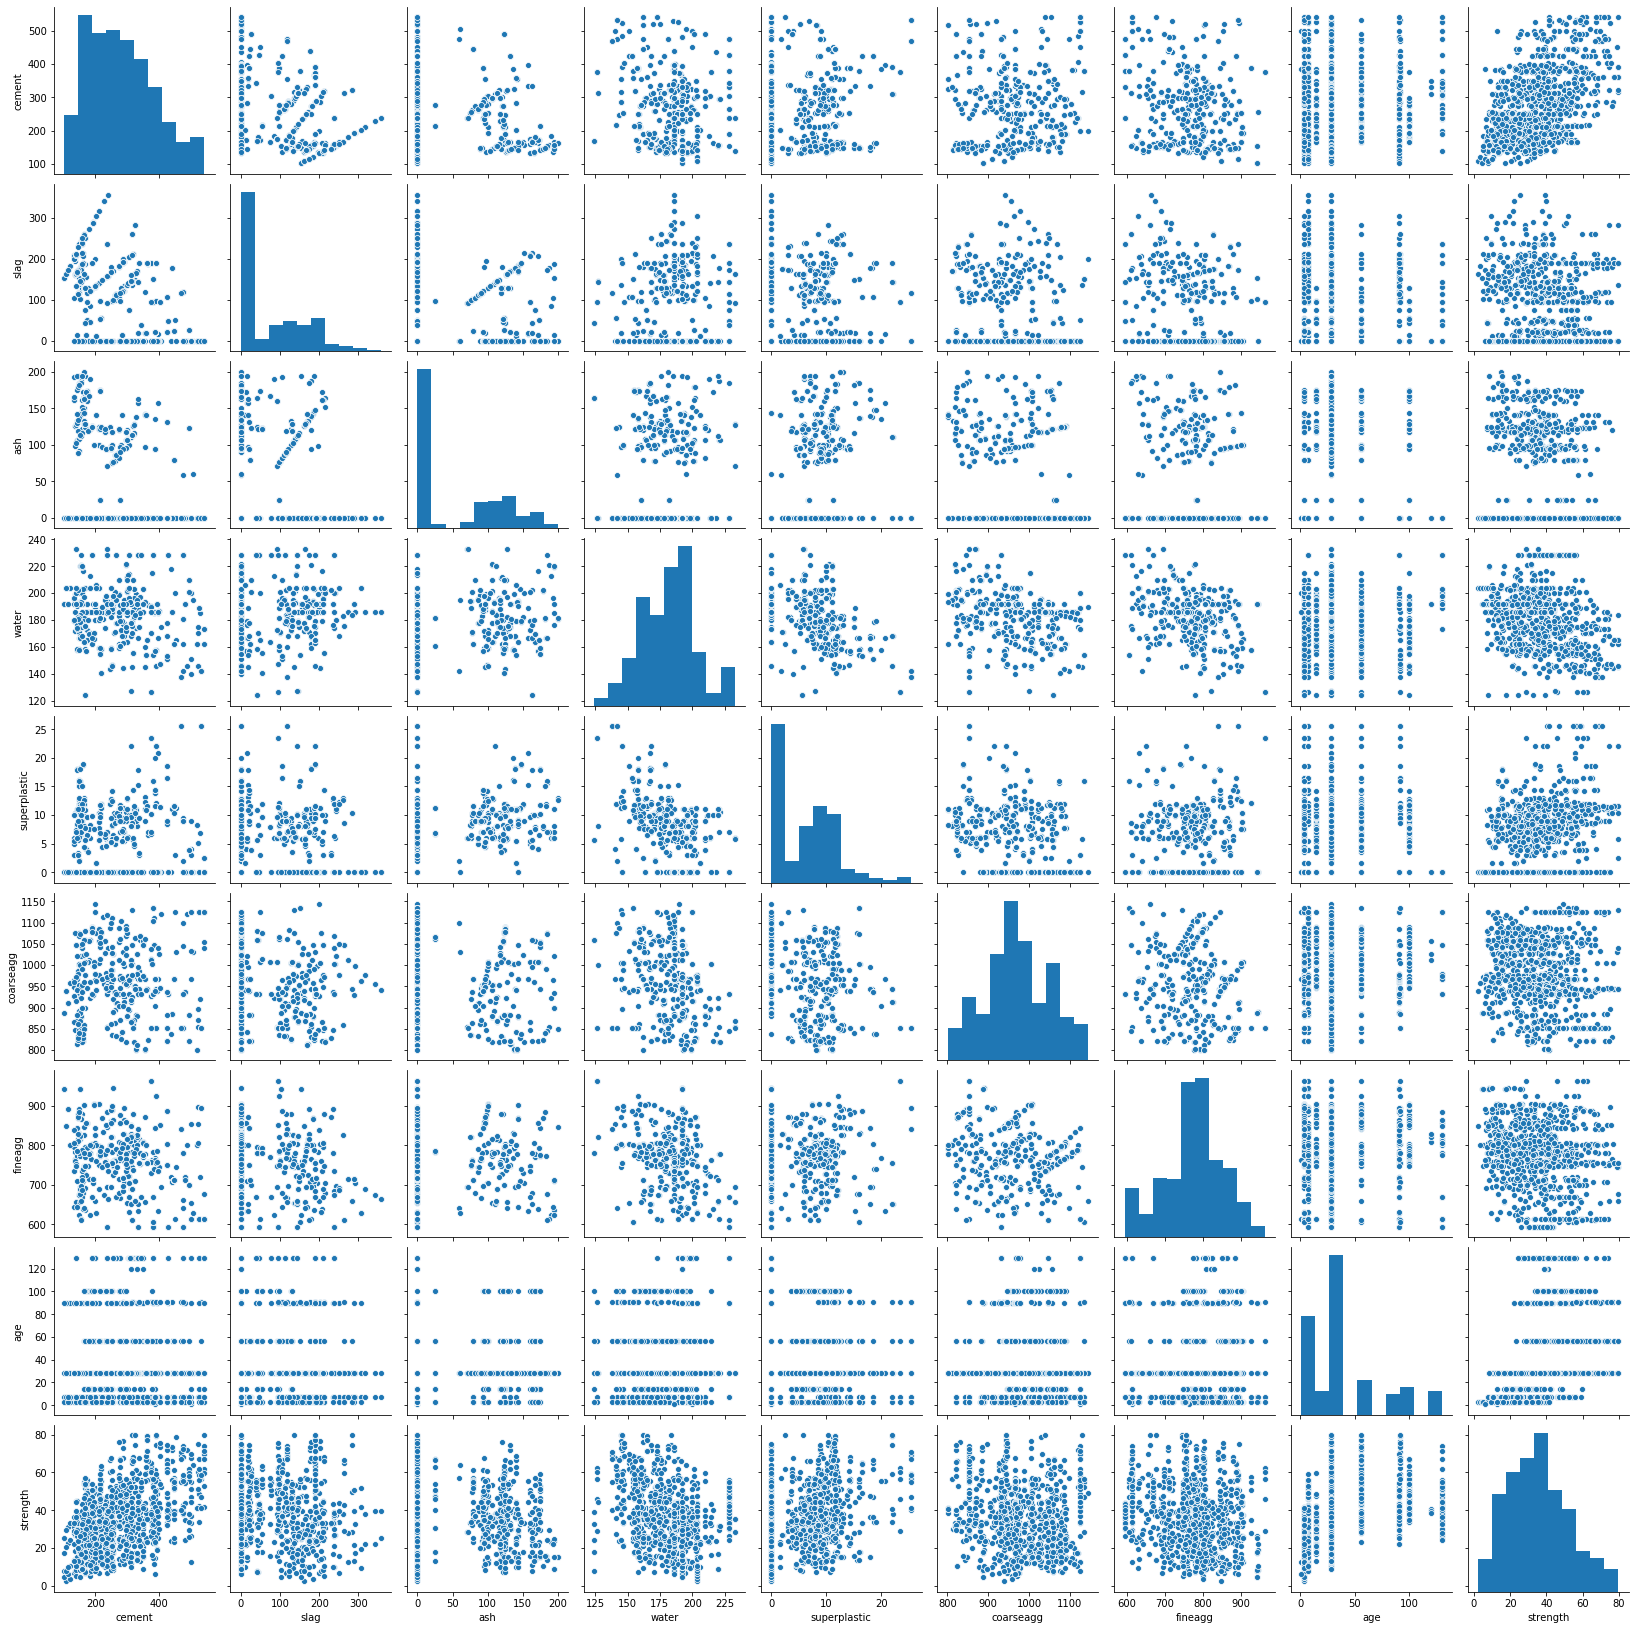

In [14]:
sns.pairplot(df)

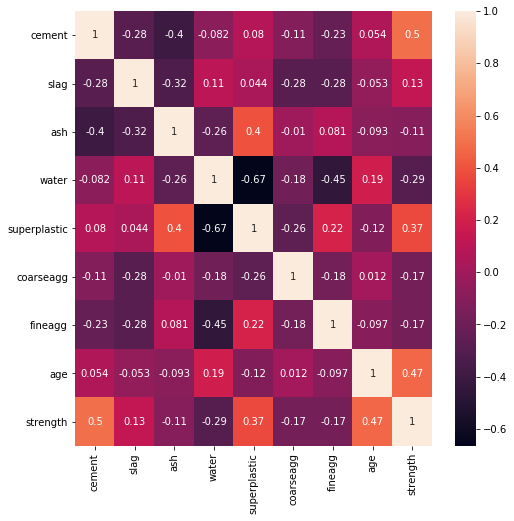

In [15]:
corr = df.corr()
plt.figure(figsize= (8,8)) 
sns.heatmap(corr,annot=True)

- There is some multicollinearity among a few variables
- Seeing individual distributions of the predictors, 'cement' and 'age' can be a good predictor 
- Most of them idividually are quiet weak predictors

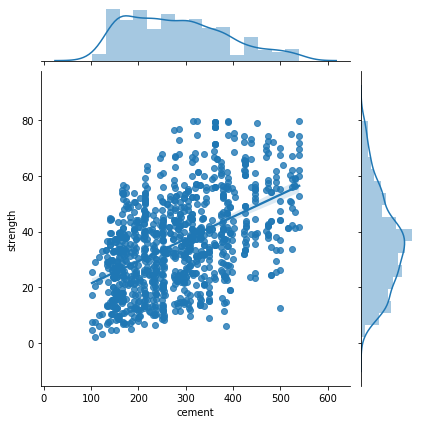

In [16]:
sns.jointplot(df['cement'],df['strength'],kind='reg')

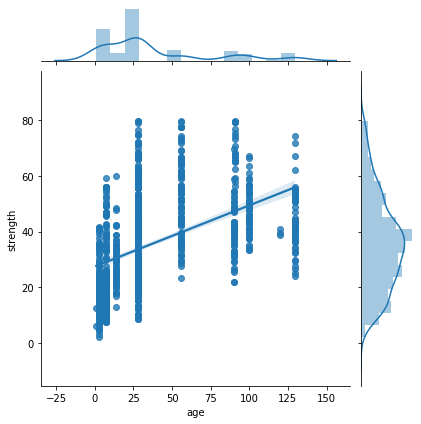

In [17]:
sns.jointplot(df['age'],df['strength'],kind='reg')

- There is a linear relation between cement and strength.
-  There is very less linear relation between age and strength


## Deliverable 2

In [18]:
# creation of age composite feature
def create_aggcolumn(data):
    if data['age'] <=30:
        return '1'
    if data['age']>30 and data['age']<=60:
        return '2'
    if data['age']>60 and data['age']<=90:
        return '3'
    if data['age']>90 and data['age']<=120:
        return '4'
    if data['age']>120 and data['age']<=150:
        return '5'
    if data['age']>150 and data['age']<=180:
        return '6'
    if data['age']>180 and data['age']<=210:
        return '7'
    if data['age']>210 and data['age']<=240:
        return '8'
    if data['age']>240 and data['age']<=270:
        return '9'
    if data['age']>270 and data['age']<=300:
        return '10'
    if data['age']>300 and data['age']<=330:
        return '11'
    else:
        return'12'
df['age_in_month'] = df.apply(lambda df:create_aggcolumn(df),axis=1)

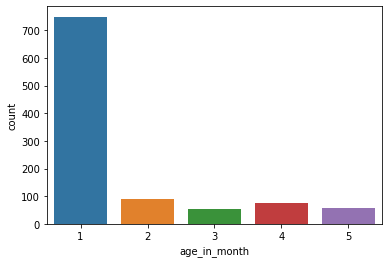

In [19]:
sns.countplot(df['age_in_month'])

In [20]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength', 'age_in_month'],
      dtype='object')

In [21]:
df=df.drop(['age_in_month'],axis=1)

In [22]:
X=df.drop('strength',axis=1)
y=df['strength']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((721, 8), (309, 8), (721,), (309,))

In [24]:

from sklearn.preprocessing import MinMaxScaler 

scaler1 = MinMaxScaler()

X_train = scaler1.fit_transform(X_train) 
X_test= scaler1.fit_transform(X_test)


In [25]:
def fit_n_print(model, X_train, X_test, y_train, y_test):  
    from sklearn.metrics import r2_score , mean_squared_error
    
    #fittrain and predict test
    model.fit(X_train, y_train)   
    pred_test = model.predict(X_test) 
    
    #calculate metrics of regression
    RMSE=np.sqrt(mean_squared_error(y_test,pred_test))
    r_squared=r2_score(y_test, pred_test)
    
    return RMSE,r_squared

### Using different regression models

In [26]:
# fit linear regression

from sklearn.linear_model import LinearRegression
lr = LinearRegression() 
lr_RMSE, lr_r_squared = fit_n_print(lr, X_train, X_test, y_train, y_test)

print('RMSE of linear regression',lr_RMSE)
print('R squared of linear regression',lr_r_squared)

RMSE of linear regression 9.019530636203534
R squared of linear regression 0.6930793264891895


In [27]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=.3)

ridge_RMSE, ridge_r_squared = fit_n_print(ridge, X_train, X_test, y_train, y_test)

In [28]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)

lasso_RMSE, lasso_r_squared = fit_n_print(ridge, X_train, X_test, y_train, y_test)

In [29]:

result1 = pd.DataFrame({'Model' : ['Linear Regression','Ridge', 'Lasso'],
                        'RMSE': [lr_RMSE,  ridge_RMSE ,  lasso_RMSE ],
                        'r_squared' : [lr_r_squared ,ridge_r_squared , lasso_r_squared ]})
result1

,Model,RMSE,r_squared
0,Linear Regression,9.019531,0.693079
1,Ridge,9.021200,0.692966
2,Lasso,9.021200,0.692966


In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)



print(poly_clf.score(X_test2, y_test))

0.7274545898147451


- Comparitively linear regression polynomial regression giving good score, so we should consider complex model

### Gaussian mixture clustering

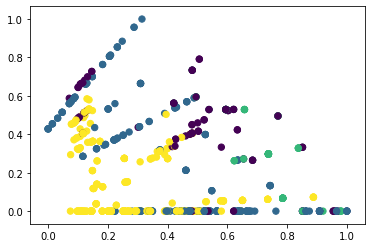

In [36]:
# now let's try GMM clustering, which tries to fit normally-distributed clusters
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)
gmm.fit(X_train)

# predict the cluster for each data point
cluster_gmm = gmm.predict(X_train)

plt.scatter(X_train[:, 0], X_train[:, 1], c=cluster_gmm, s=40, cmap='viridis');


In [46]:
clusterdf = pd.DataFrame(cluster_gmm,columns=['label'])
df_labeled = df.join(clusterdf)
df_labeled['label']=df_labeled['label'].astype('category')
df_labeled

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,label
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89,3.0
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51,2.0
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,29.22,1.0
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85,1.0
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,18.29,2.0
...,...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28.0,13.29,NaN
1026,531.3,0.0,0.0,141.8,25.5,852.1,893.7,3.0,41.30,NaN
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,44.28,NaN
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,129.5,55.06,NaN


In [50]:
df2=df_labeled.copy()

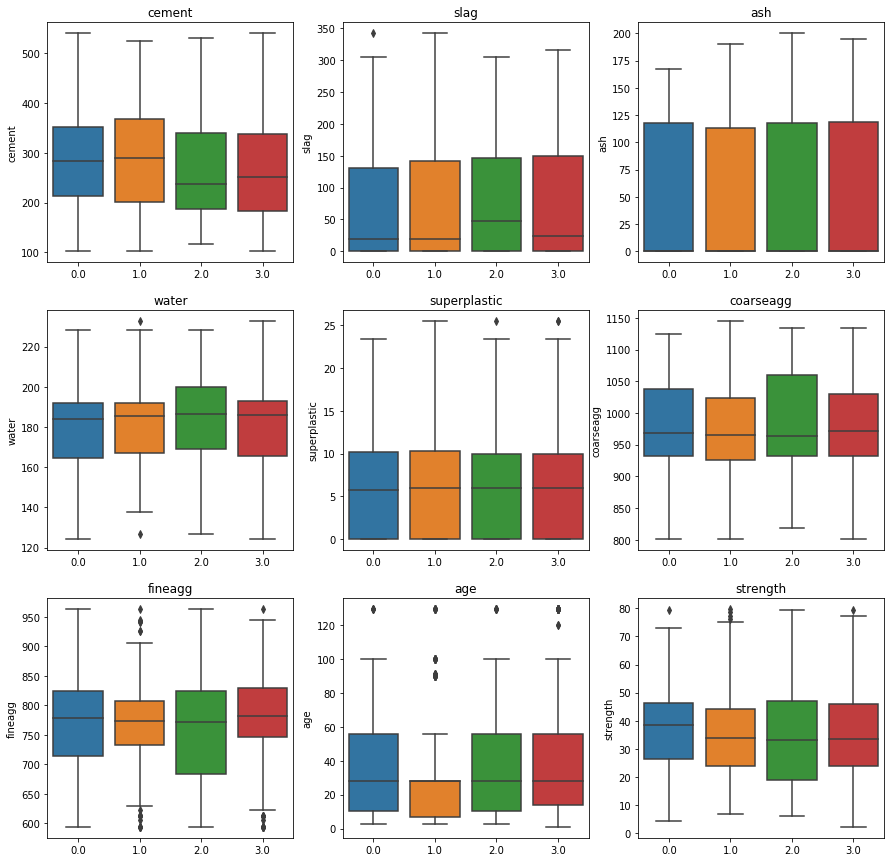

In [51]:
var=np.arange(1,len(df2.columns))
plt.figure(figsize= (15,15)) 
for i in var:
    plt.subplot(3,3,i)
    sns.boxplot(df2.iloc[:,9],df2.iloc[:,(i-1)])
    plt.xlabel("")
    plt.title(df2.columns[i-1])
    i+=1

- No feature has distinct clusters
- So No use of splitting data into clusters 

## Deliverable 3

In [52]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()


dt_RMSE, dt_r_squared = fit_n_print(dt_model, X_train, X_test, y_train, y_test)
dt_RMSE, dt_r_squared

(6.735323089617826, 0.8288506976074759)

In [53]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [55]:
predictors=['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age']

In [56]:
for feature in zip(predictors, dt_model.feature_importances_):
    print(feature)

('cement', 0.3914850047311811)
('slag', 0.12330639918014209)
('ash', 0.007997679045767871)
('water', 0.09992294781721064)
('superplastic', 0.033419704903740036)
('coarseagg', 0.019616565815624164)
('fineagg', 0.018895197761189874)
('age', 0.3053565007451442)


- Cement, age are havimg more importance and highly effecting strengnth.
- slag and superplastic are moderately effecting strength.
- remaing others are week predictors for strength.


## Deliverable 4

In [57]:
from sklearn.ensemble import GradientBoostingRegressor
gbmTree = GradientBoostingRegressor(n_estimators=50)

gbm_RMSE, gbm_r_squared = fit_n_print(gbmTree, X_train, X_test, y_train, y_test)

gbm_RMSE, gbm_r_squared

(6.2370114736115445, 0.8532387667873981)

In [58]:
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor(n_estimators=50)
rfr_RMSE, rfr_r_squared = fit_n_print(rfr_model, X_train, X_test, y_train, y_test)
rfr_RMSE, rfr_r_squared 

(5.2641576347571775, 0.895451925690922)

- Comparitevely all the models randomforest regressor giving good accuracy.

In [59]:
importance=rfr_model.feature_importances_

for i,v in enumerate(importance):
    print("feature : % 2d, score : % 0.5f" %(i, v)) 

feature :  0, score :  0.31864
feature :  1, score :  0.08510
feature :  2, score :  0.01891
feature :  3, score :  0.08804
feature :  4, score :  0.09414
feature :  5, score :  0.02502
feature :  6, score :  0.03915
feature :  7, score :  0.33101


In [60]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(rfr_model, threshold=0.05)
sfm.fit(X_train, y_train)

X_train_imp = sfm.transform(X_train)
X_test_imp = sfm.transform(X_test)

In [61]:
rfr_important = RandomForestRegressor(n_estimators=500)

rfr_imp_RMSE, rfr_imp_r_squared = fit_n_print(rfr_model, X_train_imp, X_test_imp, y_train, y_test)

rfr_imp_RMSE, rfr_imp_r_squared

(5.5983384712631725, 0.8817566921670346)

In [62]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10 , stop = 50, num = 2)]   # returns evenly spaced 10 numbers
# Number of features to consider at every split
max_features = ['auto', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)]  # returns evenly spaced numbers can be changed to any
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


### Randomised search cross validation

In [63]:
%time
rf_random = RandomizedSearchCV(estimator=rfr_model, param_distributions=random_grid,n_iter = 5, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,return_train_score=True)

# Fit the random search model
rf_random.fit(X_train_imp, y_train);

Wall time: 0 ns
Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    5.4s finished


In [64]:
rf_random.best_params_

{'n_estimators': 50,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': None,
 'bootstrap': False}

In [65]:
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor(n_estimators=50,min_samples_split=5,min_samples_leaf=1,max_features='log2',max_depth=None,bootstrap=False)
rfr_RMSE_CV, rfr_r_squared_CV = fit_n_print(rfr_model, X_train, X_test, y_train, y_test)
rfr_RMSE_CV, rfr_r_squared_CV

(4.936815932240555, 0.9080499147118553)

### Model performance range by 95% by bootstrap resampling

In [66]:
df1= pd.read_csv("Concrete.csv")

In [67]:

start_time=time.time()

from sklearn.utils import resample
values = df1.values

# Number of bootstrap samples to create
n_iterations = 100


# size of a bootstrap sample
n_size = int(len(df1) * 1)


# run bootstrap

 # empty list that will hold the scores for each bootstrap iteration
stats = list()  

for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  
    
    # fit model
    rfTree = DecisionTreeRegressor()
    rfTree.fit(train[:,:-1], train[:,-1])   
    y_test = test[:,-1]    

    # evaluate model
    
    predictions = rfTree.predict(test[:, :-1])   
    score = rfTree.score(test[:, :-1] , y_test)

    stats.append(score)

print("--- %s seconds ---" % (time.time() - start_time)) 

--- 81.29079031944275 seconds ---


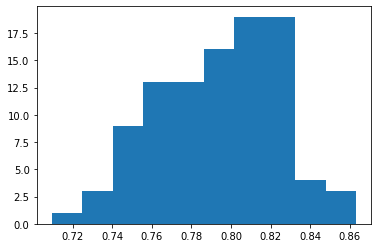

95.0 confidence interval 73.7% and 85.2%


In [68]:
# plot scores

plt.hist(stats)
plt.show()

# confidence intervals
alpha = 0.95

p = ((1.0-alpha)/2.0) * 100  
lower = max(0.0, np.percentile(stats, p))

p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))

print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

- At 95% the model is giving accuracy between  73.7%  to 85.2% with decision tree model 